# Markov Chains Homework

**Prepared for the Bank of Portugal Computational Economics Course (Oct 2025)**

**Author:** [John Stachurski](https://johnstachurski.net)


## Ergodicity

Let $\{X_t\} = \{X_0, X_1, \ldots\}$ be a Markov chain generated by stochastic
matrix $P$.

Each $X_t$ takes values in a fixed and finite set $S$.

A *distribution* on $S$ is a function $\psi \colon S \to \mathbb R_+$
satisfying

$$
    \sum_{x \in S} \psi(x) = 1
$$


A *distribution* on $S$ is called *stationary* for $P$ when

$$
    \psi(x') = \sum_{x \in S} P(x, x') \psi(x)
    \quad \text{for all } x' \in S
$$

We also write this as $\psi = \psi P$, where $\psi$ is understood as a row vector.

It is well-known that $P$ has a unique stationary distribution whenever $P$ is irreducible.


Let $P$ have this property and let $\psi^*$ denote the stationary distribution.

Under irreducibility, the following result also holds: for all $ x \in S $,

$$
\frac{1}{m} \sum_{t = 1}^m \mathbb{1}\{X_t = x\}  \to \psi^*(x)
    \quad \text{as } m \to \infty
$$

Here

- $ \mathbb{1}\{X_t = x\} = 1 $ if $ X_t = x $ and zero otherwise  
- convergence is with probability one  
- the result does not depend on the distribution  of $ X_0 $  

The convergence asserted above is a special case of a law of large numbers
result for Markov chains -- see, for example, [EDTC](http://johnstachurski.net/edtc.html),
section 4.3.4.

The result tells us that the fraction of time the chain spends at state $ x $
converges to $ \psi^*(x) $ as time goes to infinity.

This gives us another way to interpret the stationary distribution.

### Example

Consider a worker who, at any given time $t$, is either unemployed (state 0)
or employed (state 1).

Suppose that, over a one-month period,

1. the unemployed worker finds a job with probability $f \in (0, 1)$.
1. the employed worker loses her job and becomes unemployed with probability $s \in (0, 1)$.

Given the above information, we can write out the transition probabilities in matrix form as

$$
    P =
    \begin{pmatrix}
        1 - f & f \\
        s & 1 - s
    \end{pmatrix}
$$




Assume that $ f \in (0,1) $ and $ s \in (0,1) $, so that irreducibility and aperiodicity both hold.

## Exercise

The stationary distribution is $ \psi^* = (p, 1-p) $, where

$$
    p = \frac{s}{f + s}
$$


Confirm that $\psi^* = \psi^* P$.

In [1]:
# Complete this

import numpy as np

# Define parameter values
f = 0.2
s = 0.1

In [2]:
for _ in range(20):
    print("Solution below!")

Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!


In [3]:
# Build stochastic matrix
P = np.array([[1 - f, f],
              [s, 1 - s]])


p = s/(f + s)                 # stationary unemployment probability
ψ_star = np.array([p, 1-p])

print("ψ_star =", ψ_star)
print("ψ_star @ P =", ψ_star @ P)

ψ_star = [0.33333333 0.66666667]
ψ_star @ P = [0.33333333 0.66666667]


**Remark**: In the cross-sectional interpretation, the value $p$ is the unemployment rate (fraction of people unemployed).

In view of our ergodicity result, it is also the fraction of time that a single worker can expect to spend unemployed.

## Exercise

According to the discussion above, if $ f \in (0,1) $ and $ s \in (0,1) $, then, in the long-run, the fraction
of time spent unemployed will be

$$
p := \frac{s}{f + s}
$$

In other words, if $ \{X_t\} $ represents the Markov chain for
employment, then $ \bar X_m \to p $ as $ m \to \infty $, where

$$
\bar X_m := \frac{1}{m} \sum_{t = 1}^m \mathbb{1}\{X_t = 0\}
$$

This exercise asks you to illustrate convergence by computing
$ \bar X_m $ for large $ m $ and checking that
it is close to $ p $.

You will see that this statement is true regardless of the choice of initial
condition or the values of $ f, s $, provided both lie in
$ (0, 1) $.

Here's some code to start you off.

In [4]:
import quantecon as qe
import matplotlib.pyplot as plt

f = s = 0.1
p = s / (f + s)

P = ((1 - f,       f),               # Careful: P and p are distinct
     (    s,   1 - s))
mc = qe.MarkovChain(P)

In [5]:
# Put your solution here

In [6]:
for _ in range(20):
    print("Solution below!")

Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!


The plots below show the time series of $ \bar X_m - p $ for two initial
conditions.

As $ m $ gets large, both series converge to zero.

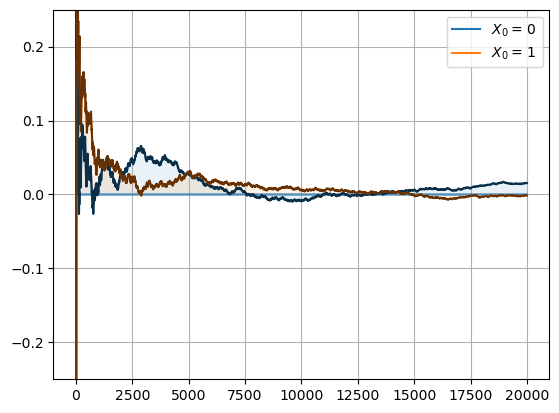

In [7]:
N = 20_000
fig, ax = plt.subplots()
ax.set_ylim(-0.25, 0.25)
ax.grid()
ax.hlines(0, 0, N, lw=2, alpha=0.6)   # Horizonal line at zero

for x0 in (0, 1):
    # Generate time series for worker that starts at x0
    X = mc.simulate(N, init=x0)
    # Compute fraction of time spent unemployed, for each n
    X_bar = (X == 0).cumsum() / (1 + np.arange(N, dtype=float))
    # Plot
    ax.fill_between(range(N), np.zeros(N), X_bar - p, alpha=0.1)
    ax.plot(X_bar - p, label=f'$X_0 = \, {x0} $')
    # Overlay in black--make lines clearer
    ax.plot(X_bar - p, 'k-', alpha=0.6)

ax.legend(loc='upper right')
plt.show()

## Computing Expectations


We are interested in computing expressions like

$$
    \mathbb E [ h(X_t) ] 
$$

and conditional expectations such as

$$
    \mathbb E [ h(X_{t + k})  \mid X_t = x] 
$$

where

- $ \{X_t\} $ is a Markov chain generated by $ n \times n $ stochastic matrix $ P $
-  $ \psi $ is the distribution of $ X_0 $
- $ h $ is a given function, which, in terms of matrix
  algebra, we’ll think of as the column vector  


$$
    h
    = \left(
    \begin{array}{c}
        h(x_1) \\
        \vdots \\
        h(x_n)
    \end{array}
      \right)
$$

Computing the unconditional expectation  is easy.

We just sum over the marginal  distribution  of $ X_t $ to get

$$
\mathbb E [ h(X_t) ]
= \sum_{x \in \mathbb X} (\psi P^t)(x) h(x)
$$


Since $ \psi $ and hence $ \psi P^t $ are row vectors, we can also
write this as

$$
\mathbb E [ h(X_t) ]
=  \psi P^t h
$$

For the conditional expectation we need to sum over the conditional distribution
of $ X_{t + k} $ given $ X_t = x $.

We already know that this is $ P^k(x, \cdot) $, so


$$
\mathbb E [ h(X_{t + k})  \mid X_t = x]
= (P^k h)(x) 
$$

The vector $ P^k h $ stores the conditional expectation $ \mathbb E [ h(X_{t + k})  \mid X_t = x] $ over all $ x $.

### Expectations of Geometric Sums

To compute present values we often need to calculate expectation of a geometric sum, such as
$ \sum_t \beta^t h(X_t) $.

In view of the preceding discussion, this is

$$
\mathbb{E} \left[
        \sum_{t=0}^\infty \beta^t h(X_t) \mid X_0 = x
    \right]
    =         \sum_{t=0}^\infty \mathbb{E} \left[ \beta^t h(X_t) \mid X_t = x
    \right]
        = \sum_{t=0}^\infty ((\beta P)^t h)(x)
$$

**Exercise**  Suppose that the state of the economy is given by Hamilton's Markov chain, so that

In [8]:
P = ((0.971, 0.029, 0.0), 
     (0.145, 0.778, 0.077), 
     (0.0,   0.508, 0.492))

Suppose that current profits $\pi(X_t)$ of a firm are given by the vector

In [9]:
π = (10, 5, -25)

Let the discount factor be

In [10]:
β = 0.99

Using the Neumann series lemma, which tells us that

$$
    (I - \beta P)^{-1}  = I + \beta P + \beta^2 P^2 + \cdots
$$

compute the expected present value of the firm.

In [11]:
# Put your solution here

In [12]:
for _ in range(20):
    print("Solution below!")

Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!
Solution below!


In [13]:
π = np.asarray(π)
P = np.asarray(P)
I = np.identity(len(π))
v = np.linalg.solve(I - β * P, π)
for i, val in enumerate(v):
    print(f"The value in state {i} is {val:.2f}.")

The value in state 0 is 844.22.
The value in state 1 is 789.96.
The value in state 2 is 725.82.
